## Валидация моделей классификации

### Работу выполнил Токарев С.К. 
##### Студент группы Т12О-101М-20

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,-0.889273,-0.537896,-1.959469,2
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,-1.228211,-1.375899,-1.434209,2


Найдите лучший классификатор по метрике f1-score

In [29]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
decision_tree_predicted = ['Decision tree: ', decision_tree.predict(X)]

gaussian = GaussianNB()
gaussian.fit(X, y)
gaussian_predicted = ['Gaussian: ', gaussian.predict(X)]

k_neighbours = KNeighborsClassifier()
k_neighbours.fit(X, y)
k_neighbours_predicted = ['K-neighbours: ', k_neighbours.predict(X)]

l_regression = LogisticRegression()
l_regression.fit(X, y)
l_regression_predicted = ['Linear regression: ', l_regression.predict(X)]

r_forest = RandomForestClassifier()
r_forest. fit(X, y)
r_forest_predicted = ['Random forest: ', r_forest.predict(X)]

general_classes = []

for c_res in [decision_tree_predicted, gaussian_predicted, k_neighbours_predicted, l_regression_predicted, r_forest_predicted]:
    general_classes.append([c_res[0], f1_score(y, c_res[1], average='weighted')])
    print(general_classes[-1][0], general_classes[-1][1])

print('\nBest classifiers are:')
general_classes.sort(key=lambda x: x[1], reverse=True)
for c in general_classes[:2]:
  print(c[0], c[1])

Decision tree:  1.0
Gaussian:  0.9498119457062514
K-neighbours:  0.979846223428313
Linear regression:  0.979846223428313
Random forest:  1.0

Best classifiers are:
Decision tree:  1.0
Random forest:  1.0


## Валидация моделей линейной регрессии

Пользуясь методом .score подберите наилучшее значение степени полинома

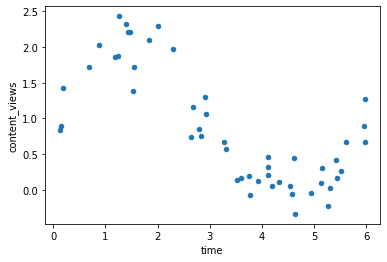

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)


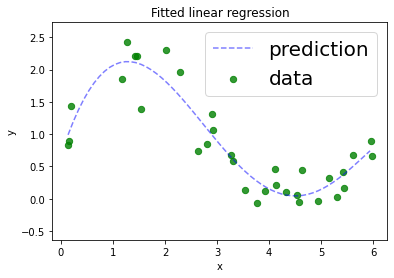

In [33]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
res = {}

for pwr in range(1, 20):
    X_train_pwr = generate_degrees(X_train, pwr)
    X_test_pwr = generate_degrees(X_test, pwr)
    reg_pwr = LinearRegression().fit(X_train_pwr, y_train)
    res[pwr] = reg_pwr.score(X_test_pwr, y_test)

res = sorted(res.items(), key=lambda item:item[1], reverse=True)
print(f"Best polynom's power {res[0][0]}, score = {res[0][1]}")

Best polynom's power 3, score = 0.9313123641187698
